# Importing the requierd packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import seaborn as sns
%matplotlib inline
import  statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy.stats import boxcox

In [2]:
# Uploading the file.

heights = pd.read_csv("heights.csv")
heights

,AM_Height,PM_Height
0,1728.75,1720.25
1,1538.25,1528.50
2,1462.25,1452.50
3,1782.50,1776.50
4,1671.00,1667.00
5,1581.75,1571.00
6,1673.75,1664.50
7,1721.75,1708.50
8,1646.50,1636.00
9,1793.75,1781.75


# Test Assumptions


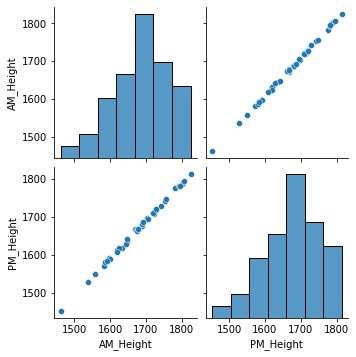

In [3]:
# Testing for Normaility and Linearity

sns.pairplot(heights)

In [28]:
# Looks pretty Linear

# Testing for Homoscedasticity

In [4]:
x = heights['AM_Height']
y = heights['AM_Height']

model = sm.OLS(y,x).fit()

In [5]:
pred_val = model.fittedvalues.copy()
true_val = heights['PM_Height'].values.copy()
residual = true_val - pred_val

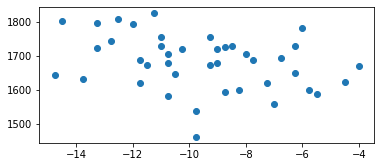

In [6]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(residual, pred_val)

In [32]:
# The residuals do not look random and don't fall under a straight line, so not foloowing Homoscedasticity.

In [7]:
# the Breusch Pagan test 

sms.diagnostic.het_breuschpagan(residual, heights[['PM_Height']])

(32.64221620394206, nan, 156.22426710457955, 2.144041642881724e-15)

In [34]:
# Since the p-value is significant, the data has violated the assumption of Homoscedasticity.

In [8]:
sms.linear_harvey_collier(model)

/opt/homebrew/lib/python3.9/site-packages/statsmodels/stats/diagnostic.py:1517: RuntimeWarning: invalid value encountered in true_divide
  rresid_standardized = rresid_scaled / np.sqrt(sigma2)  # N(0,1) distributed


Ttest_1sampResult(statistic=nan, pvalue=nan)

In [36]:
# Going by this one, it looks like the assumption hasn't been violated,
# but should still try to fix it because both the graph and BP are showing issues

(array([1., 1., 4., 6., 4., 9., 7., 3., 3., 3.]),
 array([5.21052681e+11, 5.92351778e+11, 6.63650875e+11, 7.34949971e+11,
        8.06249068e+11, 8.77548165e+11, 9.48847262e+11, 1.02014636e+12,
        1.09144546e+12, 1.16274455e+12, 1.23404365e+12]),
 <BarContainer object of 10 artists>)

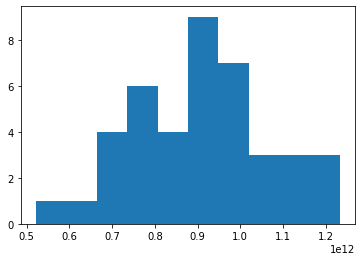

In [9]:
transformed, _ = boxcox(heights['AM_Height'])

plt.hist(transformed)



In [10]:
x = transformed
model1 = sm.OLS(y,x).fit()

model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              AM_Height   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.983
Method:                 Least Squares   F-statistic:                              2358.
Date:                Fri, 01 Apr 2022   Prob (F-statistic):                    3.51e-37
Time:                        17:56:06   Log-Likelihood:                         -278.83
No. Observations:                  41   AIC:                                      559.7
Df Residuals:                      40   BIC:                                      561.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           1.81e-09   3.73e-11     48.560      0.000    1.73e-09    1.89e-09
==============================================================================
Omnibus:                        0.319   Durbin-Watson:                   1.561
Prob(Omnibus):                  0.853   Jarque-Bera (JB):                0.499
Skew:                          -0.096   Prob(JB):                        0.779
Kurtosis:                       2.495   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
# Then create new residual values


pred_val = model1.fittedvalues.copy()
true_val = heights['PM_Height'].values.copy()
residual = true_val - pred_val

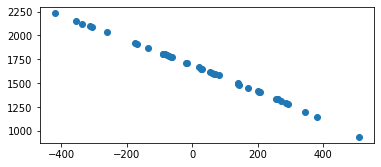

In [12]:
# And re-plot, to yield this graph:

fig, ax = plt.subplots(figsize=(6, 2.5))
_ = ax.scatter(residual, pred_val)

In [13]:
sms.diagnostic.het_breuschpagan(residual, heights[['AM_Height']])

(16.182069054140932, nan, 26.081254056903486, 8.414574373394422e-06)

In [14]:
sms.linear_harvey_collier(model)

/opt/homebrew/lib/python3.9/site-packages/statsmodels/stats/diagnostic.py:1517: RuntimeWarning: invalid value encountered in true_divide
  rresid_standardized = rresid_scaled / np.sqrt(sigma2)  # N(0,1) distributed


Ttest_1sampResult(statistic=nan, pvalue=nan)

# Screening for Outeliers

/opt/homebrew/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:696: RuntimeWarning: divide by zero encountered in true_divide
  return self.resid / sigma / np.sqrt(1 - hii)


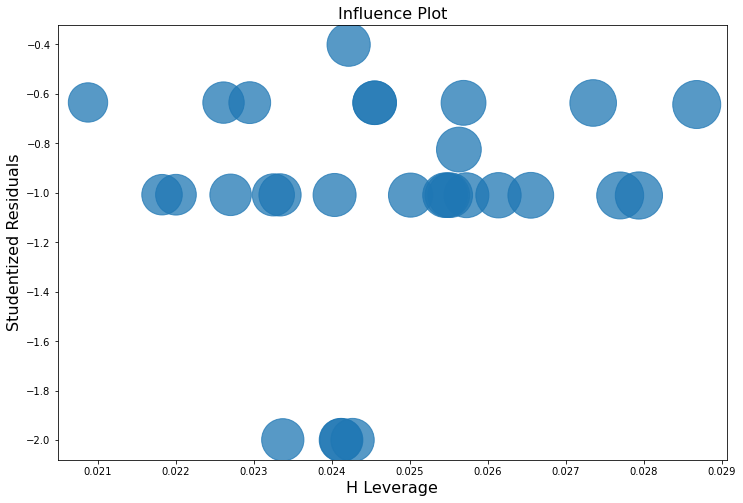

In [15]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(model, alpha = .05, ax = ax, criterion="cooks")


In [16]:
# If you'd rather look via table instead of a graph, just to double check the values, you can:

infl = model.get_influence()
print(infl.summary_frame())

    dfb_AM_Height   cooks_d  standard_resid  hat_diag  dffits_internal  \
0        0.000000  0.026936       -1.009966  0.025727        -0.164121   
1             inf  0.021094       -1.007201  0.020370        -0.145237   
2             inf  0.004746       -0.503096  0.018407        -0.068893   
3       -3.307259  0.028732       -1.010809  0.027352        -0.169507   
4        0.000000  0.025079       -1.009091  0.024037        -0.158364   
5             inf  0.022357       -1.007802  0.021538        -0.149522   
6       15.589352  0.025166       -1.009132  0.024116        -0.158637   
7        0.000000  0.026707       -1.009858  0.025519        -0.163422   
8        0.000000  0.024314       -1.008730  0.023338        -0.155930   
9       10.491727  0.029117       -1.010989  0.027698        -0.170637   
10      -3.336960  0.030210       -1.011500  0.028680        -0.173809   
11       0.000000  0.029384       -1.011114  0.027938        -0.171417   
12      10.491727  0.027389       -1.0

/opt/homebrew/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:777: RuntimeWarning: divide by zero encountered in true_divide
  dfbetas /= np.sqrt(self.sigma2_not_obsi[:, None])


In [17]:
heights.drop(heights.index[36], inplace=True)

In [83]:
x = heights['AM_Height']
y = heights['PM_Height']

In [84]:
modelNew = sm.OLS(y,x).fit()

In [85]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              AM_Height   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          5.582e+32
Date:                Wed, 30 Mar 2022   Prob (F-statistic):                        0.00
Time:                        20:26:40   Log-Likelihood:                          1107.4
No. Observations:                  41   AIC:                                     -2213.
Df Residuals:                      40   BIC:                                     -2211.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AM_Height      1.0000   4.23e-17   2.36e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                       94.233   Durbin-Watson:                   0.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2476.914
Skew:                           6.166   Prob(JB):                         0.00
Kurtosis:                      39.025   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
modelNew.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              PM_Height   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.774e+07
Date:                Wed, 30 Mar 2022   Prob (F-statistic):                   5.93e-112
Time:                        20:26:59   Log-Likelihood:                         -93.134
No. Observations:                  40   AIC:                                      188.3
Df Residuals:                      39   BIC:                                      190.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AM_Height      0.9944      0.000   4212.277      0.000       0.994       0.995
==============================================================================
Omnibus:                        1.607   Durbin-Watson:                   2.189
Prob(Omnibus):                  0.448   Jarque-Bera (JB):                1.295
Skew:                           0.247   Prob(JB):                        0.523
Kurtosis:                       2.270   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Very different data summmary. 